# Abstract

# Introduction 

# Data

## Franke Function and Terrain Data
We will revisit these datasets from project one. For further description refer to the report for project 1 [1]

## MNIST Handwritten Numbers
For our classification problem we will be using the MNIST database of handwritten numbers, or more specifically a subset of this available as the digits dataset in scikit-learn[2]. 

This dataset contains pixel images of handwritten numbers. In total the digits dataset contains 1797 8x8 images. Meaning we have a dataset consisting of 1797 data points, each with 64 descriptors or inputs, and one output, the label. 

For a plot of one such data point, see figure 1.

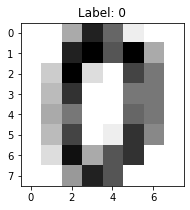

Figure 1: Plot of one of the entries in the digits dataset showing a number 0.


In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the data
digits = datasets.load_digits()

# Plot a datapoint; the first number in the set
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Label: %d" % digits.target[0])
plt.show()
print("Figure 1: Plot of one of the entries in the digits dataset showing a number 0.")

We will use this dataset to fit and test our classification models. To prepare the data we split it into a training set and a test set. I use $\texttt{scikit-learn}$'s $\texttt{train_test_split}$ for this and a 80-20 split.

In [5]:
from sklearn.model_selection import train_test_split

# Setting the predictors/inputs and the target
digit_target = digits.target
digit_input = digits.images
n_inputs = len(digit_input)
digit_input = digit_input.reshape(n_inputs, -1)

# Splitting into training and test
train_size = 0.8

X_train, X_test, y_train, y_test = train_test_split(digit_input, digit_target, stratify=digit_target,
                                                    train_size=train_size)

I want to make sure that the different classes, i.e. the labels are similarly distributed among the test set and the training test. If for instance no occurrences of the label '3' is found in the training set, models trained on this set are expected to perform poorly on identifying such digits in the test set. To avoid such issues I have set the $\texttt{stratify}$ parameter in $\texttt{train_test_split()}$ to the target variable. Let us see if it did its job.

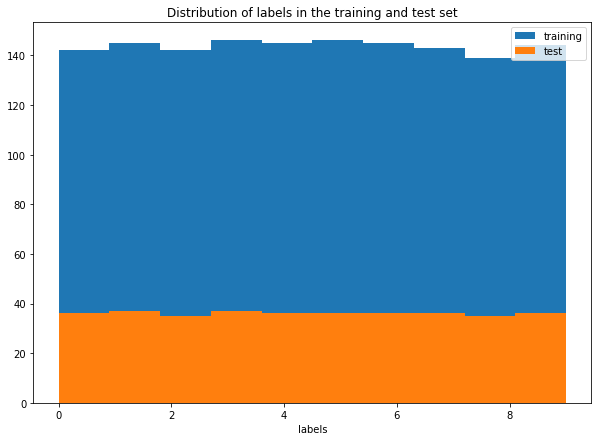

Figure 2: Histogram of label distribution in training and test set.


In [6]:
# Creating histogram 
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(y_train, label='training')
ax.hist(y_test, label='test')
plt.legend() 
plt.xlabel("labels") 
plt.title("Distribution of labels in the training and test set")
  
# Show plot 
plt.show() 
print("Figure 2: Histogram of label distribution in training and test set.")

Figure 2 shows the distribution of the different labels int the test and training sets. We see that the labels seem to be very evenly distributed.

# Methods
For descriptions of ordinary least squares and ridge regression, please refer to my report for project 1[1].
## Performance Measures
For a description of the mean square error and $r^2$ please again consult the report of project 1[1].

### Accuracy
We use the accuracy score to measure the performance of our classification methods. This measure is given by the number of correctly guessed targets $t_i$ divided by the total number of targets, that is

$$
\text{Accuracy} = \frac{\sum_{i=1}^n I(t_i = y_i)}{n} ,
$$

where $I$ is the indicator function, which takes the value $1$ if $t_i = y_i$ and $0$ otherwise (for a binary classification problem). Here $t_i$ represents the target and $y_i$ is the prediction. The number of targets is given by $n$.

## Regression Methods

### Logistic Regression

Logistic regression is a machine learning algorithm typically used for classification problems. It is most typically applied in binary classification problems, e.g. true/false, yes/no, positive/negative, but it can be extended to problems with multiple classes, called multinomial logisticc regression.

I logistic regression a logistic function is applied to model the dependent variable. Such a logistic function takes in any input value, and will always return a value between zero and one. This is often viewed as transforming the input and outputting a probability value. In classification we are interested in discrete output. Some functions, like the step function (see figure number) produces a binary zero or one, while we for other functions, like the sigmoid translate the output values according to a cutoff, e.g. output above or equal 0.5 gets coded as a one.

The classic function used to transform the input in logistic regression is the sigmoid, see the section on activation functions and figure 4.

The general form of logistic regression is

$$
\hat{y_k} = g(\beta X_k),
$$

where $g(z)$ is the sigmoid and $\beta$ are weights fit to the inputs in training the model.

While we in linear regression used the mean square error as the cost function, this cost function will we non-convex for the logistic case. Therefore we cannot use this cost function. To find a cost function we can use the maximum likelihood estimator. In the binary case this has the form,

$$
\begin{align*}
P((x_i,y_i)|\hat{\beta})& = \prod_{i=1}^n \left[p(y_i=1|x_i,\hat{\beta})\right]^{y_i}\left[1-p(y_i=1|x_i,\hat{\beta}))\right]^{1-y_i}\nonumber \\
\end{align*}
$$


which by taking the logarithm and reordering leads to the cross-entropy

$$
\mathcal{C}(\hat{\beta})=-\sum_{i=1}^n  \left(y_i(\boldsymbol{\beta}x_i) -\log{(1+\exp{(\boldsymbol{\beta}x_i)})}\right).
$$
The cross-entropy will be a convex function of the weights $\hat{\beta}$. To train our model we want to minimixe the derivative of the cost function with respect to the weights $\beta$.
 


#### Multinomial Logistic Regression[9]

In multinomial logistic regression, also known as softmax regression we use the same general procedure as in binomial logistic regression, but now the output of the model must be coded into discrete values using several ranges. If for example we are interested in classifying our input to one of four classes A, B, C and D we can code an output between 0 and 0.25 to A, an output between 0.25 and 0.5 to B and so forth. 

The *Softmax* function is the preferred output or activation function for multinomial logistic regression.

Using maximum likelihood and a set of $K$ classes $k$ we get

$$
\prod_{i=1}^N\prod_{k=1}^K P(y_i=k|x_i,\beta)
$$

with

$$
P(y_i=k|x_i,\beta) = \frac{\exp(\beta^{(k)T}x_i)}{\sum_{j=1}^K \exp(\beta^{(j)T}x_i)}
$$

for each training data point $i$. Here $\beta^{(k)}$ are the weights of the model.

We want to maximize this, or, equivalently minimize its logarithm

$$
C(\beta) = -\sum_{i=1}^N\sum_{k=1}^K 1\{y_i=k\}\log\frac{\exp(\beta^{(k)T}x_i)}{\sum_{j=1}^K \exp(\beta^{(j)T}x_i)}
$$

which is our cost function. Here $\{\texttt{statement}\}$ is $1$ if $\texttt{statement}$ is $\texttt{True}$ and $0$ otherwise.

To train our model we want to minimize the cost function. To do this we need the gradient, which is given by

$$
\nabla_{\beta^k} C(\beta) = -\sum_{i=1}^Nx_i\bigg(1\{y_i=k\}-P(y_i=k|x_i,\beta)\bigg).
$$

A method like stochastic gradient descent can again be used together with this to train the model and find optimal weights $\beta$-



## Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a variation of the gradient descent method. There are many different variations of gradient descent but the common denomiator is that they work to find the minima of a function (typically the cost function) by iteratively moving in the direction of steepest descent.

In other words, if we want to find the minimum of a function $F(\mathbf{x})$, we should move in the
direction of the negative gradient $-\nabla F(\mathbf{x})$.

For a (typically small) stepsize $\gamma_k > 0$ known as the step size, or learning rate we then have 

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k),
$$

An initial guess is made at the first step.

For a convex cost function and a sufficiently small stepsize $\gamma_k$ this method can be used to find the global minimum of said cost function.

One drawback of this method is that computing the gradient for large datasets can be very computationally expensive. This is where SGD and its variations comes in. Instead of calculating the gradiant for all datapoints, SGD chooses a subset of the data to calculate the gradient on. The method divides the dataset into a set of $N/M$ so-called mini-batches, and for each step the gradient is calculated on one of these mini-batches. These mini-batches are denoted by $B_k$ where $k=1,\cdots,N/M$. $N$ is here the size of the training data, and $M$ is the size of each mini-batch.

Rewriting the gradient descent method in terms of a cost function $C(\mathbf{\beta})$, we get

$$
\mathbf{\beta}_{k+1} = \mathbf{\beta}_k - \gamma_k \nabla_{\beta} C(\mathbf{x}_k,\mathbf{\beta}_k),
$$

Taking the gradient with respect to one mini-batch per step we get

$$
\beta_{k+1} = \beta_k - \gamma_k \sum_{i \in B_k}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}_k)
$$

which is the stochastic gradient descent method.

In linear regression the cost function is the mean square error. For the gradient of the cost function we then have

$$
\nabla_{\beta} C(\mathbf{\beta}) = \frac{2}{n} \bigg( X^T (X\beta-y) + \lambda \beta \bigg)
$$

here I have added an $L_2$ regularization parameter $\lambda$ which will be zero for ordinary least squares, but take some non-zero value for ridge. The number of datapoints is given by n. 

For logistic regression the cost function is the cross-entropy, which we went over in the section on logistic regression.

### Decaying Learning Rate
Gradient methods can be sensitive to the choice of the step size or learning rate $\gamma$, and both too small and too large values can give very poor results. One technique to limit this issue is to gradually decrease the learning rate as we move through the epochs. The idea is that we ise large steps in the beginning when we are likely to be far away from the solution, and smaller steps as we approach the minimum. 

The let the learning rate $\gamma_j$ *decay* according to the function

$$
\gamma_j(t; t_0, t_1) = \frac{t_0}{t+t_1} 
$$ 

where $t_0, t_1 > 0$ are fixed parameters, and $t=i \cdot m + b$ with $i$ denoting the current epoch number, $m$ the number of mini-batches, and $b$ the current batch number.


[//]: # (Add momentum? Momentum based GD: http://localhost:8888/notebooks/Documents/Studier/fys-stk3155/Exercises/MachineLearning/doc/pub/Splines/ipynb/Splines.ipynb)


## Neural Network
Neural networks are a group of models originally inspired by biological neuron used in supervised and unsupervised learning as well as specialized tasks such as image processing. They are non-linear models and can be considered powerful extensions of supervised learning methods like linear and logistic regression  We will be focusing on a type of neuroal networks called feed-forward neural networks (FFNN). 

<img src="../Report/FFNN_illustration.png" width=500 height=350 />
Figure 3: A schematic showing a fully connected FFNN with one hidden layer.

### Feed-Forward Neural Network
A FFNN is a type of artifical neural network (ANN) made up of layers of connected neurons, also called nodes. They consist of an input layer, followed by one or more so-called hidden layers, and finally an output layer. In each layer there is a certain number of nodes, and this number can vary between the layers. The nodes of one layer are connected with the nodes of the next with an associated weight variable. In addition there may be a bias in each layer. Training the model amounts to finding optimal values for these weights and biases.

In FFNN the information flows only forward, from one layer to the next. If all nodes in each layer are connected to all the nodes in the next we have a fully connected network. According to the *universal approximation theorem*[4], a FFNN with just a single hidden layer containing a finite number of neurons can approximate a continuous multidimensional function to arbitrary accuracy. This result assumes that the activation function for the hidden layer is a non-constant, bounded and monotonically-increasing continuous function.[5] 

For a fully-connected model each input node sends its input $x_j$ to every node in the first hidden layer. The input to node $i$ of the first hidden layer becomes:

$$
\begin{equation} z_i^1 = \sum_{j=1}^{M} w_{ij}^1 x_j + b_i^1
\end{equation}
$$

Each input is weighted bu $w_{ij}$ and in addition to the sum over the weighted inputs the node receives a bias contribution $b_i^1$. This bias is to assure we don't end up with zero activation in a layer, as this would stop the flow of information from the input to the output, and give us no output. The ouput from node $i$ in the first hidden layer is 

$$
\begin{equation}
 y_i^1 = f(z_i^1) = f\left(\sum_{j=1}^M w_{ij}^1 x_j  + b_i^1\right)
\end{equation}
$$

where $f(z)$ is the activation function for the hidden layer. The output from the nodes in the hidden layer are given as weighted inputs to all the nodes in the next hidden layer in the same way as described here for this first layer, with a (different or equal) activation function giving the ouput of that next layer. This continues until the output layer. The output from this final layer is the model layer. Typically the nodes in the hidden layers all have the same activation function, while the ouput layer has a different one.

Generalizing we get the output from a model with $l$ hidden layers as:

$$
\begin{equation}
y^{l+1}_i = f^{l+1}\left[\!\sum_{j=1}^{N_l} w_{ij}^{l+1} f^l\left(\sum_{k=1}^{N_{l-1}}w_{jk}^{l}\left(\dots f^1\left(\sum_{m=1}^{M} w_{nm}^1 x_m+ b_n^1\right)\dots\right)+b_j^{l}\right)+b_i^{l+1}\right] 
\end{equation}
$$

which is a nested sum of weighted activation functions.

With the biases and activations as $N_l \times 1$ column vectors $\hat{b}_l$ and $\hat{y}_l$, where the $i$-th element of each vector is the bias $b_i^l$ and activation $y_i^l$ of node $i$ in layer $l$ respectively, and the weights as an $N_{l-1} \times N_l$ matrix, $\mathrm{W}_l$ we can write the sum as a matrix-vector multiplication. Looking at hidden layer 2 for simplicity we can write this in matrix notation as 

$$
\begin{equation}
 \hat{y}_2 =  
 f_2\left(\left[\begin{array}{cccc}
    w^2_{11} &w^2_{12}  &\cdots &w^2_{1N_l} \\
    w^2_{21} &w^2_{22} &\cdots &\vdots \\
    \vdots   &\vdots   &       &\vdots \\
    w^2_{N_{l-1}1} &w^2_{N_{l-1}2} &\cdots &w^2_{N_{l-1}N_l} \\
    \end{array} \right] \cdot
    \left[\begin{array}{c}
           y^1_1 \\
           y^1_2 \\
           \vdots \\
           y^1_{N_l} \\
          \end{array}\right] + 
    \left[\begin{array}{c}
           b^2_1 \\
           b^2_2 \\
           \vdots \\
           b^2_{N_l} \\
          \end{array}\right]\right).
\end{equation}
$$

In general we have an expression for $z_i^l$, the activation of node $i$ of the $l$-th layer as

$$
z_i^l = \sum_{j=1}^{N_{l-1}}w_{ij}^la_j+b_i^l.
$$

Here $b_i^l$ is the bias into node $i$ in layer $l$, $w_{ij}^l$ is the weight from node $j$ in layer $l-1$ on the input to node $i$ in layer $l$, and $a_j$ the output from node $j$ in layer $l-1$.

The output from node $i$ in layer $l$ becomes

$$
a_i^l = f^l(z_i^l) = \frac{1}{1+\exp{-(z_i^l)}}.
$$

Using the sigmoid as activation function in layer $l$.

## Regularization
We will be adding an $L_2$ regularization parameter $\lambda$ to our logistic regression as well as our neural network code. See description of ridge regression in project 1[1] for more info on $L_2$ regularization.

### L2 Regularization FFNN
when adding L2 regularixation to a feed forward neural network with backpropagation like we have, this amounts to adding a regularization term to the cost function minimizing the size of the individual weights in the model.

$$
C = C_0 + \frac{\lambda}{2n}\sum_w w^2
$$

where $C_0$ is the original cost function without regularization and $\lambda$ is the regularization parameter. The regularization does not have a dependency to the biases, so these are not affected, but the derivative of the cost function with respect to the weights becomes

$$
\frac{\partial C}{\partial w} = \frac{\partial C_0}{\partial w} + \frac{\lambda}{n}w.
$$

Using this the weights are updated according to

$$
w -> w\bigg(1-\frac{\gamma\lambda}{n}\bigg)-\gamma\frac{\partial C_0}{\partial w}
$$


### Activation Function
A choice must be made for the activation function to be usen in the nodes of the hidden layer as well as the nodes of the ouput layer.
I will be using the sigmoid function as well ass the ReLU and Leaky ReLU in the hidden layers, and the softmax for the output layer when classifying handwritten numbers. For regression with FFNN I will use ReLU as the activation function for the output layer.

#### Sigmoid Function

This activation function is popularly used in the ouput layer of binary classification problems. This function is at risk for the so-called vanishing gradient problem; that the gradient becomes too small for effective model training. the function has the form

$$
f(x) = \frac{1}{1 + e^{-x}}.
$$
A plot is seen in figure 4. 

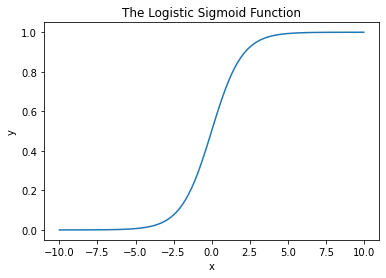

Figure 4: Plot of the logistic sigmoid function


In [7]:
import numpy as np
x = np.linspace(-10,10,100)
y = 1./(1+np.exp(-x))
plt.plot(x,y)
plt.title("The Logistic Sigmoid Function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("Figure 4: Plot of the logistic sigmoid function")

#### Hyperbolic Tangent Function

A mathematically shifted version of the sigmoid that generally performs better than the sigmoid. It has the form

$$
f(x) = \tanh(x),
$$
and a plot is seen in figure 5.

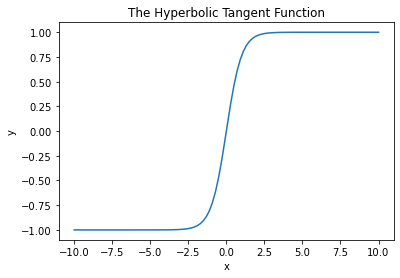

Figure 5: Plot of the hyperbolic tangent function


In [10]:
y = np.tanh(x)
plt.plot(x,y)
plt.title("The Hyperbolic Tangent Function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("Figure 5: Plot of the hyperbolic tangent function")

#### Binary Step Function

Also called the heaviside step function, or the unit step function. It is an "all or nothing" approach andflips from 0 to 1 at $x=0$.

$$
f(x) =
\left\{
	\begin{array}{ll}
		1  & \mbox{if } x > 0 \\
		0 & \mbox{if } x \leq 0
	\end{array}
\right.
$$
A plot is seen in figure 6.

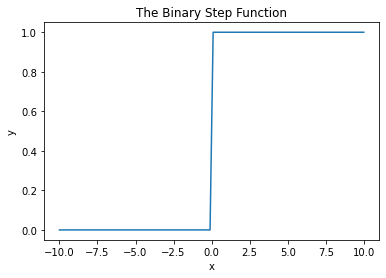

Figure 6: Plot of the binary step function


In [11]:
y = np.where(x>0, 1, 0) 
plt.plot(x,y)
plt.title("The Binary Step Function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("Figure 6: Plot of the binary step function")

#### ReLU Function
ReLu, or Rectified Linear Unit is a popular and fairly general activation function. It is a popular choice for the activation function of the hidden layers. It is computationally cheap and therefore efficient. One issue is that all negative values are mapped to zero, which can lead to what is called *dying ReLU problem*.  This is an issue that can occur if the weighted sum of a neuron's inputs is negative. The neuron will then produce 0 as its output. Because the gradient of the ReLU function is 0 when its input is negative this is unlikely to change and the neuron is essentialy "dead".

The rectifier is defined as the positive part of its argument

$$
f(x) = x^{+} = \max(0,x).
$$
A plot is seen in figure 7.

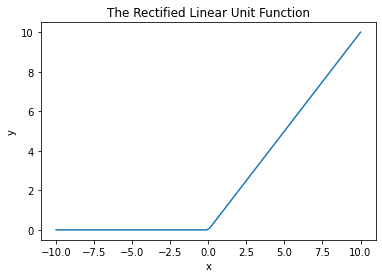

Figure 7: Plot of the ReLU function


In [12]:
y = [max(0,xi) for xi in x]
plt.plot(x,y)
plt.title("The Rectified Linear Unit Function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("Figure 7: Plot of the ReLU function")

#### Leaky ReLU Function
Leaky ReLU solves the dying ReLU problem described in the last subsection by assigning a small positive slope for $x < 0$. This does however reduce the performance/computational cost.

$$
f(x) =
\left\{
	\begin{array}{ll}
		x  & \mbox{if } x \geq 0 \\
		0.01x & \mbox{otherwise }
	\end{array}
\right.
$$
See figure 8 for a plot of this function.

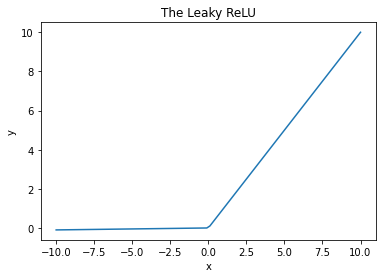

Figure 8: Plot of the Leaky ReLU function. It is a bit hard to spot, but the slope from x=-10 to x=0 is positive.


In [13]:
y = np.where(x>0, x, 0.01*x) 
plt.plot(x,y)
plt.title("The Leaky ReLU")
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("Figure 8: Plot of the Leaky ReLU function. It is a bit hard to spot, but the slope from x=-10 to x=0 is positive.")

#### ELU Function

The ELU or exponential linear unit function is another function in the ReLU family proposed to avoid the *dying ReLU problem*. It does however add another parameter to the model $\alpha$.

$$
f(x) =
\left\{
	\begin{array}{ll}
		\alpha(\exp(x)-1  & \mbox{if } x < 0 \\
		x & \mbox{otherwise }
	\end{array}
\right.
$$
A plot is seen in figure 9.

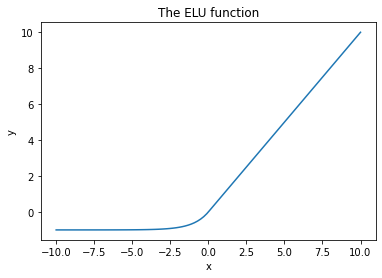

Figure 9: Plot of the ELU function. I have set the paramater alpha equal to 1.


In [15]:
y = np.where(x<0, np.exp(x)-1, x) 
plt.plot(x,y)
plt.title("The ELU function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("Figure 9: Plot of the ELU function. I have set the paramater alpha equal to 1.")

#### Softmax Function

A generalization of the logistic function often used in multinomial logistic regression.

$$
f(x) = \frac{e^x}{\sum_{j=1}^K e^{x}},
$$

The function takes as input a vector $x$ of $K$ real numbers, and normalizes it into a probability distribution consisting of $K$ probabilities proportional to the exponentials of the input numbers. See figure 10 for a plot.

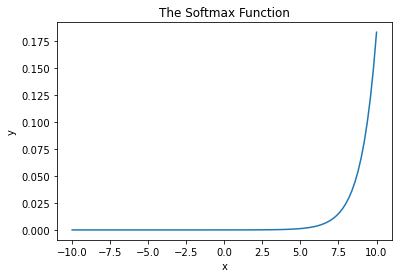

Figure 10: Plot of the softmax function.


In [16]:
y = np.exp(x)/np.sum(np.exp(x))
plt.plot(x,y)
plt.title("The Softmax Function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("Figure 10: Plot of the softmax function.")

# Results and Discussion

## Linear Regression with Gradient Descent

In project one we looked modeled the Franke function using ordinary least squares (OLS) and ridge regression. Now we want to compare these methods to methods using stochastic gradient descent to obtain the fit, i.e the parameters or weights $\beta$. 

The comparison is done on data generated with the Franke function, with added stochastic noise with $\sigma^2=0.1$. See figure 11 for a 3d plot of these data.

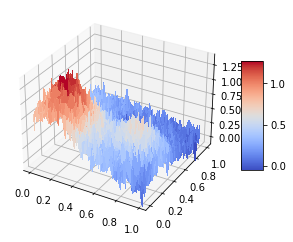

Figure 11: 3D plot of the Franke function with added noise.


In [17]:
import sys
sys.path.append('../Code')
import CreateData as cd

n = 100 # number of datapoints 
data = cd.CreateData(n,seed=8)

variance = 0.1
data.add_normal_noise(0,variance)
data.plot_data()
print("Figure 11: 3D plot of the Franke function with added noise.")

degree = 5
test_fraction = 0.25
data.create_design_matrix(degree)
data.split_dataset(test_fraction)
data.scale_dataset(type='standard') # Using SciKit's StandardScaler

In [21]:
# Checking implementation of OLS #
## Remove? ##
import LinearRegressionwithGradientDescent as lr_gd
import numpy as np

# Ordinary least squares model
ols_model = lr_gd.LinearRegressionwithGradientDescent(method="ols",alpha=0)
ols_train = ols_model.fit(data.X_train,data.z_train)
ols_test = ols_model.predict(data.X_test)

# scikit-learn ols
from sklearn.linear_model import LinearRegression
skl_ols = LinearRegression(fit_intercept=False) # OLS
skl_ols.fit(data.X_train, data.z_train)

skl_z_hat = skl_ols.predict(data.X_test)

print("** Comparing my ols implementation with that of scikit-learn: **")
print("The arrays are about the same: ", np.allclose(ols_test,skl_z_hat))
print("The mean squared error between my result and that of scikit-learn is: ", ols_model.mean_square_error(ols_test,skl_z_hat))


** Comparing my ols implementation with that of scikit-learn: **
The arrays are about the same:  True
The mean squared error between my result and that of scikit-learn is:  2.0601779122756744e-22


We fit our models to this data. For OLS there are no parameters to tune. We find the mean square error and the $r^2$ score of our OLS method, see table 1.

In [22]:
def mse(pred, actual):
    if(pred.shape!=actual.shape):
        pred = pred.reshape((-1, 1))
        actual = actual.reshape((-1, 1))
        
    return np.mean((actual-pred)**2)
    #return np.square(np.subtract(actual,pred)).mean()

def r2(pred,actual):
    if(pred.shape!=actual.shape):
        pred = pred.reshape((-1, 1))
        actual = actual.reshape((-1, 1))
    return 1-np.sum((actual-pred)**2)/np.sum((actual-np.mean(actual))**2)

In [24]:
# Plot train and test errors for OLS and OLS with SGD
print("Table 1: Error measures fitting OLS method to noisy Franke data.")
print("*** Error measures for OLS method: ***")
print("Train:   MSE: ", mse(ols_train,data.z_train), "  r2: ", r2(ols_train,data.z_train))
print("Test:    MSE: ", mse(ols_test,data.z_test), "  r2: ", r2(ols_test,data.z_test))

Table 1: Error measures fitting OLS method to noisy Franke data.
*** Error measures for OLS method: ***
Train:   MSE:  0.012086801248348334   r2:  0.8644398531166579
Test:    MSE:  0.012501297568858788   r2:  0.8583664210243516


For linear regression with gradient descent we have several parameters, the learning rate, the batch size, and the number of epochs. We explore how the error is affected by various choices for these parameters. The results can be seen in table 2. We can see that the error improves steadily, although somewhat erraticaly as the learning rate increases before exploding when we reach a too large learning rate. Too large is seen to be about $\gamma>0.07$ . A plot can be seen in figure 12.

In [27]:
# Varying the learning rate #
n_epochs = 100
batchsize = int(len(data.z_train)/10)
learning_rates = np.logspace(-4, -1.1, 50)

r2_lr = np.zeros((len(learning_rates),2))
mse_lr = np.zeros((len(learning_rates),2))

print("Table 2: Error measures when varying the learning rate used in OLS with SGD as training method.")
print("learning rate:    mse_train:   mse_test:")
for i in range(len(learning_rates)):
    current_model = lr_gd.LinearRegressionwithGradientDescent(method="sgd",alpha=0,n_epochs=n_epochs,batchsize=batchsize,learning_rate=learning_rates[i])
    train_hat = current_model.fit(data.X_train,data.z_train)
    test_hat = current_model.predict(data.X_test)
    
    mse_lr[i,:] = (mse(train_hat,data.z_train),mse(test_hat,data.z_test))
    r2_lr[i,:] = (r2(train_hat,data.z_train),r2(test_hat,data.z_test))
    print(f"   %.3E         %.3f      %.3f" %(learning_rates[i],mse_lr[i,0],mse_lr[i,1]))



Table 2: Error measures when varying the learning rate used in OLS with SGD as training method.
learning rate:    mse_train:   mse_test:
   1.000E-04         3.970      3.976
   1.146E-04         2.510      2.512
   1.313E-04         1.321      1.255
   1.505E-04         0.627      0.630
   1.725E-04         3.529      3.488
   1.977E-04         2.365      2.312
   2.265E-04         3.107      3.093
   2.596E-04         0.974      0.898
   2.975E-04         2.694      2.677
   3.409E-04         0.434      0.417
   3.907E-04         1.495      1.435
   4.477E-04         0.683      0.676
   5.131E-04         0.699      0.705
   5.880E-04         1.407      1.427
   6.739E-04         0.574      0.565
   7.722E-04         0.377      0.350
   8.850E-04         0.329      0.327
   1.014E-03         0.861      0.817
   1.162E-03         0.350      0.345
   1.332E-03         0.234      0.245
   1.526E-03         0.091      0.090
   1.749E-03         0.281      0.288
   2.005E-03         0.187 

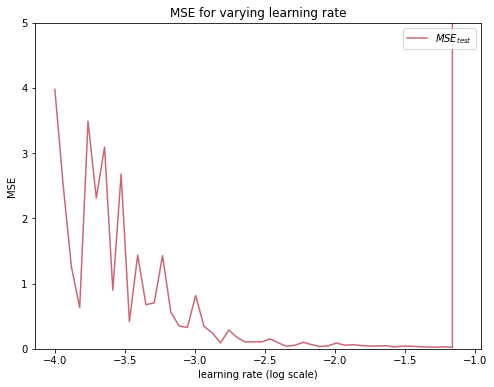

Figure 12: The mean square error on the test set as the learning rate of the SGD method is increased.
No regularization.


In [42]:
fig = plt.figure(figsize=(8, 6))
#plt.plot(np.log10(learning_rates),mse_lr[:,0], color='#117733', label='$MSE_{train}$')
plt.plot(np.log10(learning_rates),mse_lr[:,1], color='#CC6677', label='$MSE_{test}$')
plt.xlabel('learning rate (log scale)')
plt.ylabel('MSE')
plt.title('MSE for varying learning rate')
axes = plt.gca()
axes.set_ylim([0, 5])
plt.legend()
plt.show()
print("Figure 12: The mean square error on the test set as the learning rate of the SGD method is increased.\nNo regularization.")

The increased error for very small learning rate can be explained by the SGD method taking such small steps down the slope it does not reach a minimum, whereas with a too large learning rate the minimum is skipped altogether.

We can let the learning rate vary according to a learning schedule as described in the methods section on stochastic gradient descent. Table 3 shows the results, and they are also plotted in figure 13.

In [46]:
import importlib
importlib.reload(lr_gd)
# Learning schedule #
n_epochs = 10
batchsize = int(len(data.z_train)/10)
learning_rate = 0.05

t0 = 5.0
t1 = np.logspace(1.6, 4, 50)

mse_ls = np.zeros((len(t1),2))

print("Table 3: Error measures when letting the learning rate decay as the method advances. \
\nThe parameters are t0 = 5 and t1 varies as seen in column 1.")
print("t1:   mse_train:   mse_test:")
for i in range(len(t1)):
    current_model = lr_gd.LinearRegressionwithGradientDescent(method="sgd",alpha=0,n_epochs=n_epochs,
                                                              batchsize=batchsize,learning_rate=learning_rate,
                                                              decay=True, t0=t0, t1=t1[i])
    train_hat = current_model.fit(data.X_train,data.z_train)
    test_hat = current_model.predict(data.X_test)
    mse_ls[i,:] = (mse(train_hat,data.z_train),mse(test_hat,data.z_test))
    print(f"%d      %.3f        %.3f" %(t1[i],mse_ls[i,0],mse_ls[i,1]))

Table 3: Error measures when letting the learning rate decay as the method advances. 
The parameters are t0 = 5 and t1 varies as seen in column 1.
t1:   mse_train:   mse_test:
39      229.239        224.572
44      25.058        22.522
49      0.178        0.191
55      0.055        0.055
62      0.074        0.075
69      0.133        0.130
78      0.150        0.147
87      0.051        0.051
98      0.178        0.175
109      0.076        0.078
122      0.086        0.089
137      0.157        0.163
154      0.189        0.183
172      0.060        0.056
193      0.068        0.065
216      0.203        0.203
241      0.148        0.152
270      0.311        0.297
303      0.132        0.131
339      0.192        0.191
379      0.224        0.211
425      0.352        0.326
475      0.236        0.216
532      0.687        0.651
596      0.486        0.438
667      0.733        0.698
747      0.440        0.445
836      0.364        0.380
936      0.603        0.594
1048      1.294

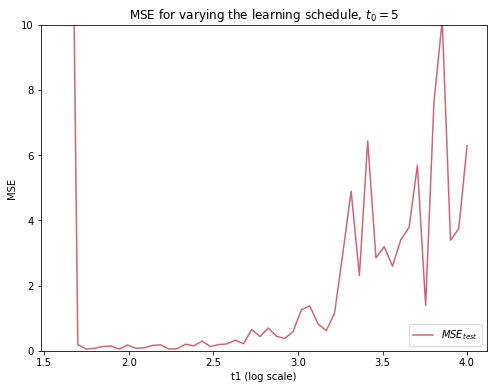

Figure 13: The mean square error for varying learning schedule.


In [48]:
fig = plt.figure(figsize=(8, 6))
#plt.plot(np.log10(t1),mse_ls[:,0], color='#117733', label='$MSE_{train}$')
plt.plot(np.log10(t1),mse_ls[:,1], color='#CC6677', label='$MSE_{test}$')
plt.xlabel('t1 (log scale)')
plt.ylabel('MSE')
axes = plt.gca()
axes.set_ylim([0, 10])
plt.title('MSE for varying the learning schedule, $t_0=5$')
plt.legend() 
plt.show()
print("Figure 13: The mean square error for varying learning schedule.")

We see that a too small value for $\texttt{t1}$ leads to the error exploding, but the error also startes rising for large t1. The sweet spot appears to be around $50<\texttt{t1}<200$.

We also want to explore how the error is affected by the number of epochs used. See figure 14 for a plot. As expected the error decreases as the number of epochs increases. At first there is a steep improvement, but as we reach a few hundred epochs the rate of improvement has slowed down markedly and we gain very little relative to the inrease in computational cost. Although there is some benefit to increasing to 1000+ epochs, whether that is worth it or not will depend on computation cost and prescicion requirements.

In [50]:
# Varying the number of epochs #
learning_rate = 0.05
epochs = np.logspace(0.2, 4.5, 25)
mse_epoch = np.zeros((len(epochs),2))
print("Table 4: Error measures when varying the number of epochs used in the SGD method.")
print("n_epoch:  mse_train:   mse_test:")
for i in range(len(epochs)):
    current_model = lr_gd.LinearRegressionwithGradientDescent(method="sgd",alpha=0,n_epochs=int(epochs[i]),batchsize=batchsize,learning_rate=learning_rate)
    train_hat = current_model.fit(data.X_train,data.z_train)
    test_hat = current_model.predict(data.X_test)
    mse_epoch[i,:] = (mse(train_hat,data.z_train),mse(test_hat,data.z_test))
    print(f"  %d        %.5f     %.5f" %(epochs[i],mse_epoch[i,0],mse_epoch[i,1]))


Table 4: Error measures when varying the number of epochs used in the SGD method.
n_epoch:  mse_train:   mse_test:
  1        0.73866     0.66895
  2        0.18794     0.18127
  3        0.19750     0.19314
  5        0.17758     0.17385
  8        0.19946     0.18428
  12        0.09483     0.09181
  18        0.03562     0.03559
  28        0.04833     0.04671
  42        0.04542     0.04493
  64        0.04782     0.04584
  98        0.02362     0.02421
  148        0.02641     0.02706
  223        0.02175     0.02193
  338        0.02073     0.02082
  510        0.01976     0.01988
  771        0.02009     0.02029
  1165        0.01853     0.01851
  1761        0.01921     0.01917
  2660        0.01698     0.01705
  4019        0.01547     0.01556
  6072        0.01576     0.01562
  9172        0.01489     0.01494
  13856        0.01457     0.01475
  20933        0.01430     0.01440
  31622        0.01390     0.01409


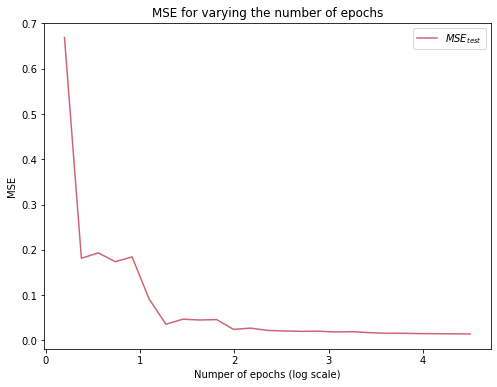

Figure 14: The mean square error for increasing number of epochs.


In [52]:
fig = plt.figure(figsize=(8, 6))
#plt.plot(np.log10(epochs),mse_epoch[:,0], color='#117733', label='$MSE_{train}$')
plt.plot(np.log10(epochs),mse_epoch[:,1], color='#CC6677', label='$MSE_{test}$')
plt.xlabel('Numper of epochs (log scale)')
plt.ylabel('MSE')
plt.title('MSE for varying the number of epochs')
plt.legend() 
plt.show()
print("Figure 14: The mean square error for increasing number of epochs.")

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Varying the batch size #
learning_rate = 0.05
n_epoch = 100

sizes = np.logspace(0.7, 3.4, 25)
mse_batch = np.zeros((len(sizes),2))

print("Table 5: Error measures when batchsize of the SGD method.")
print("batchsize:  mse_train:   mse_test:")
for i in range(len(sizes)):
    current_model = lr_gd.LinearRegressionwithGradientDescent(method="sgd",alpha=0,n_epochs=n_epoch,batchsize=int(sizes[i]),learning_rate=learning_rate)
    train_hat = current_model.fit(data.X_train,data.z_train)
    test_hat = current_model.predict(data.X_test)
    mse_batch[i,:] = (mse(train_hat,data.z_train),mse(test_hat,data.z_test))
    print(f"   %d         %.5f      %.5f" %(sizes[i],mse_batch[i,0],mse_batch[i,1]))

Table 5: Error measures when batchsize of the SGD method.
batchsize:  mse_train:   mse_test:
   5         0.13254      0.13336
   6         0.02580      0.02562
   8         0.01903      0.01923
   10         0.01875      0.01881
   14         0.02013      0.02005
   18         0.01788      0.01734
   23         0.02405      0.02380
   30         0.01768      0.01769
   39         0.01686      0.01675
   51         0.02071      0.02070
   66         0.01826      0.01824
   86         0.02165      0.02149
   112         0.01659      0.01675
   145         0.01878      0.01873
   188         0.02134      0.02176
   244         0.02371      0.02351
   316         0.02273      0.02312
   409         0.01970      0.01951
   530         0.02804      0.02754
   687         0.02270      0.02320
   891         0.04366      0.04309
   1154         0.03846      0.03949
   1496         0.03877      0.03912
   1938         0.03478      0.03615
   2511         0.03583      0.03684


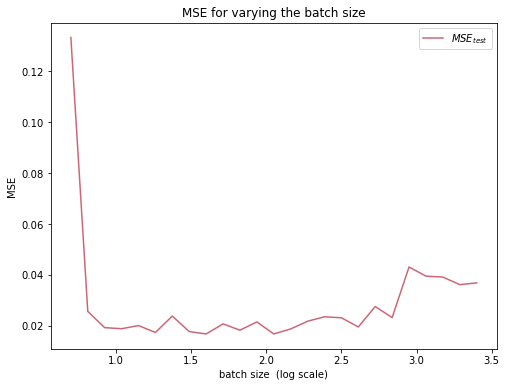

Figure 15: The mean square error for increasing the batch size.


In [60]:
fig = plt.figure(figsize=(8, 6))
#plt.plot(np.log10(sizes),mse_batch[:,0], color='#117733', label='$MSE_{train}$')
plt.plot(np.log10(sizes),mse_batch[:,1], color='#CC6677', label='$MSE_{test}$')
plt.xlabel('batch size  (log scale)')
plt.ylabel('MSE')
plt.title('MSE for varying the batch size')
plt.legend() 
plt.show()
print("Figure 15: The mean square error for increasing the batch size.")

As we see the error explodes for small batch size, but for any batchsize > 7 or so the performance is fairly stable at a minimum. As the batchsize grows very big the error starts to climb up, but even at about 1/3 of the size of the training set the error is small. The reason the error starte increasing here is that the number of epochs is constant, so with very large batchsize we perform fewer steps per epoch and the increased precision of the gradient calculation does not make up for this reduction in steps. For very small batchsizes the estimate for the gradient is simply too inaccurate, and we are not guaranteed to be moving down the gradient slope.

We move on to look at ridge regression with gradient descent. I will be using k-fold cross validation to explore choices for the regression parameter $\lambda$ and how this choice affects model performance. Figure 16 shows a heatmap of the results.

In [62]:
importlib.reload(lr_gd)
import pandas as pd
n_epoch = 100

lambdas = np.logspace(-5, 1, 25)
gammas = np.logspace(-4, -2, 10)
mse_ridge = np.zeros((len(lambdas),len(gammas)))
for i in range(len(lambdas)):
    for j in range(len(gammas)):
        current_model = lr_gd.LinearRegressionwithGradientDescent(method="sgd",alpha=lambdas[i],n_epochs=n_epoch,
                                                                  batchsize=batchsize,learning_rate=gammas[j])
        mse_ridge[i,j], r2_mean = current_model.k_fold_cv(data.X_train,data.z_train,k=5, shuffle=True)

lambda_label = ['lbd=%.1e'%i for i in lambdas]
gamma_label = ['gma=%.1e'%i for i in gammas]
mse_rigde_df = pd.DataFrame(mse_ridge,index=lambda_label,columns=gamma_label)
print("Table 6: MSE for ridge regression with stochastic gradient descent on franke function with noise")
display(mse_rigde_df)

Table 6: MSE for ridge regression with stochastic gradient descent on franke function with noise


,gma=1.0e-04,gma=1.7e-04,gma=2.8e-04,gma=4.6e-04,gma=7.7e-04,gma=1.3e-03,gma=2.2e-03,gma=3.6e-03,gma=6.0e-03,gma=1.0e-02
lbd=1.0e-05,3.841254,1.932445,1.203666,0.715944,0.516028,2.908964e-01,1.925081e-01,1.608064e-01,9.652848e-02,6.286195e-02
lbd=1.8e-05,4.011811,1.944079,1.961985,1.104971,0.812574,4.761061e-01,1.671219e-01,9.316470e-02,8.086163e-02,5.744162e-02
lbd=3.2e-05,4.629211,2.489784,1.627817,1.096290,0.585827,2.637745e-01,1.710778e-01,1.042113e-01,1.016608e-01,6.036380e-02
lbd=5.6e-05,3.491269,2.121483,1.656017,1.396568,0.552813,3.670345e-01,1.370167e-01,1.354849e-01,8.497371e-02,7.539157e-02
lbd=1.0e-04,3.502692,2.154715,1.590976,1.261862,0.732945,4.093123e-01,1.980040e-01,1.055888e-01,7.026749e-02,5.546506e-02
lbd=1.8e-04,5.769006,2.012809,1.844779,1.668348,0.597612,3.475546e-01,1.824000e-01,8.575782e-02,9.769606e-02,7.807323e-02
lbd=3.2e-04,2.823850,2.403854,1.648311,1.003022,0.737686,3.121002e-01,2.207793e-01,8.763099e-02,8.062596e-02,6.622303e-02
lbd=5.6e-04,3.206965,2.133453,1.367251,0.885479,0.548825,3.050366e-01,1.638722e-01,1.182045e-01,1.017547e-01,7.436783e-02
lbd=1.0e-03,3.538441,1.418581,2.182905,0.852496,0.617868,2.422517e-01,2.692788e-01,7.649569e-02,9.522761e-02,6.743689e-02
lbd=1.8e-03,2.568345,1.968864,2.149615,1.118881,0.766507,3.376082e-01,2.287826e-01,1.332413e-01,1.053321e-01,4.981355e-02


<AxesSubplot:>

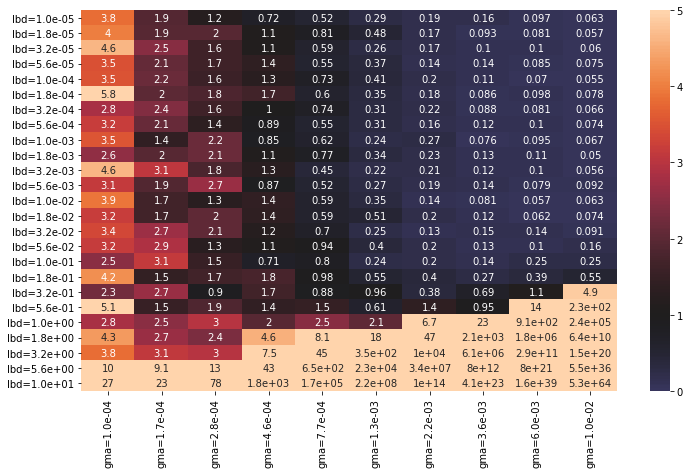

In [71]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (12, 7))
#mse_rigde_df.style.background_gradient(cmap ='coolwarm').set_properties(**{'font-size': '12px'}) 
sns.heatmap(mse_rigde_df, vmin=0,vmax=5,center=1, annot = True) 

In [72]:
print("Figure 16: A heatmap to illustrate how the mean square error of the ridge regression model with\
\nstochastic gradient descent depends on the choice of ridge parameter lambda and learning rate gamma.")

Figure 16: A heatmap to illustrate how the mean square error of the ridge regression model with
stochastic gradient descent depends on the choice of ridge parameter lambda and learning rate gamma.


We see from figure 16 that for a small enough $\lambda$, the MSE is fairly robust to the choice of the learning rate $\gamma$. As $\lambda$ grows however, the range of $\gamma$-values giving a small MSE narrows. 

Now that we have found some optimal parameters for SGD on this particular problem, let us compare our model performance with that of scikit-learn's $\texttt{SGDRegressor}$.

In [66]:
print("Table 7: Comparing my own ridge regression model with SGD with SGDRegressor from scikit-learn.")

Table 7: Comparing my own ridge regression model with SGD with SGDRegressor from scikit-learn.


In [585]:
# Using the same parameters
lmd = 0.0004
lr = 0.02
epochs = 1000

# scikit-learn's SGD regressor
from sklearn.linear_model import SGDRegressor
sklearn_sgd_model = SGDRegressor(loss='squared_loss', penalty='l2', alpha=lmd, fit_intercept=False, max_iter=epochs,
                                 shuffle=True, random_state=93, learning_rate='constant', eta0=lr)
sklearn_sgd_model.fit(data.X_train, data.z_train)
sklearn_sgd_test_pred = sklearn_sgd_model.predict(data.X_test)
print(f"SGDRegressor: mse=%.4f    r2=%0.4f" %(mse(sklearn_sgd_test_pred,data.z_test), 
                                              r2(sklearn_sgd_test_pred,data.z_test)))
# My own linear ridge regression with SGD
sgd_ridge_model = lr_gd.LinearRegressionwithGradientDescent(method="sgd",alpha=lmd,n_epochs=n_epoch,
                                                            batchsize=10,learning_rate=lr)
sgd_train_pred = sgd_ridge_model.fit(data.X_train,data.z_train)
sgd_test_pred = sgd_ridge_model.predict(data.X_test)
print(f"Own ridge SGD: mse=%.4f    r2=%0.4f" %(mse(sgd_test_pred,data.z_test), 
                                              r2(sgd_test_pred,data.z_test)))

SGDRegressor: mse=0.0308    r2=0.6509
Own ridge SGD: mse=0.0164    r2=0.8146


I see the error is actually better for my implementation using these parameter, although the method is noticeably slower. The improved error and at least part of the speed improvement is likely due to $\texttt{SGDRegressor}$ calculating the gradient on only one datapoint at a time, instead of a batch[3]. This gives a noisier/more erratic movement towards the minimum.

### Neural Network - Regression

The second of the overarching goals in this project was to use a feed forward neural network with backpropagation (FFNN) to model the Franke function. We have used the sigmoid function as activation function for the hidden layers, while the output layer has no activation function as I want the actual, continuous values, i.e. not translated into a binary yes/no value or a set of classes. Squared loss is used as cost function.

The network is set up with a number of input nodes matching the number of terms in the design matrix $\texttt{X}$, and just one output node as we only have one output, z. 

I try out a few different configurations for the hidden layer(s). Figure 17 shows a plot of the resulting $r^2$ scores, all using 100 epochs and a batchsixe of 50. The configurations correspond to the following:
* config1 = [21,1]
* config2 = [21,5,1]
* config3 = [21,10,1]
* config4 = [21,5,2,1]
* config5 = [21,5,5,1]
* config6 = [21,10,5,1]
* config7 = [21,10,10,1]
* config8 = [21,15,10,5,1]

which shows a list of the number of nodes per layer from input layer, via all the hidden layers, ending with the output layer. The model is tested on a set of learning rates, but the learning rate where the error explodes is different for the various configurations. I have plotted only the sensible values, so when the lines in figure 17 stop that means their error exploded for the next value of the learning rate $\gamma$.

In [69]:
import NeuralNet as nn
importlib.reload(nn)

# For trying out a few network configurations #
def test_network_configuration(layers_list,learning_rates,seed=135):
    r2_score = np.zeros(len(learning_rates))
    for i in range(len(learning_rates)):
        model = nn.NeuralNet(layers_list=layers_list, h_af='sigmoid', o_af='none', cost='cross-entropy', lmda=0, seed=seed)
        model.sgd(X=data.X_train, y=data.z_train, n_epochs=100, batchsize=50, learning_rate=learning_rates[i], print_epochs=False)
        pred = model.predict(data.X_test)
        r2_score[i] = nn.r2(pred,data.z_test)
        if(np.isnan(r2_score[i])):
            print('Exiting early due to \'nan\'.')
            break
        print("done with ", i, ": ",learning_rates[i],"  r2:", r2_score[i])
    return r2_score


*** config1 ***
done with  0 :  0.01   r2: 0.761854667566996
done with  1 :  0.05   r2: 0.7673911269649689
done with  2 :  0.1   r2: 0.7735394330606287


../Code\NeuralNet.py:104: RuntimeWarning: overflow encountered in add
  nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, dw_list)]


Exiting early due to 'nan'.
*** config2 ***
done with  0 :  0.01   r2: 0.7072969461119085
done with  1 :  0.05   r2: 0.7746813479541343
done with  2 :  0.1   r2: 0.8132158347677493
done with  3 :  0.5   r2: 0.8580437348591368
done with  4 :  0.75   r2: 0.8647671776185841
done with  5 :  1.0   r2: 0.8654284630643074


../Code\NeuralNet.py:260: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-z))
../Code\NeuralNet.py:151: RuntimeWarning: invalid value encountered in multiply
  delta = np.dot(self.weights[-l+1].T, delta)*self.h_af_derivative(z)


Exiting early due to 'nan'.
*** config3 ***
done with  0 :  0.01   r2: 0.7351632592303365
done with  1 :  0.05   r2: 0.7871916134467114
done with  2 :  0.1   r2: 0.8131384185680848
done with  3 :  0.5   r2: 0.8503120063594798
done with  4 :  0.75   r2: 0.8466549356351774
done with  5 :  1.0   r2: 0.797946090119066


../Code\NeuralNet.py:260: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-z))
../Code\NeuralNet.py:151: RuntimeWarning: invalid value encountered in multiply
  delta = np.dot(self.weights[-l+1].T, delta)*self.h_af_derivative(z)


Exiting early due to 'nan'.
*** config4 ***
done with  0 :  0.01   r2: 0.5395666819201383
done with  1 :  0.05   r2: 0.743980563195958
done with  2 :  0.1   r2: 0.7843728641838712
done with  3 :  0.5   r2: 0.8609954840666533
done with  4 :  0.75   r2: 0.8612323736893558
done with  5 :  1.0   r2: 0.8612944989856348
done with  6 :  2.0   r2: -1887.1257950549711
*** config5 ***
done with  0 :  0.01   r2: 0.6616165118384221
done with  1 :  0.05   r2: 0.7548740398091206
done with  2 :  0.1   r2: 0.7867048904194553
done with  3 :  0.5   r2: 0.8462229260010609
done with  4 :  0.75   r2: 0.8560237511735784
done with  5 :  1.0   r2: 0.8370345056988943
done with  6 :  2.0   r2: -2480.2075095157797
*** config6 ***
done with  0 :  0.01   r2: 0.615194612460285
done with  1 :  0.05   r2: 0.733152768161288
done with  2 :  0.1   r2: 0.775394208256324
done with  3 :  0.5   r2: 0.866842850534594
done with  4 :  0.75   r2: 0.8745172426564717
done with  5 :  1.0   r2: 0.874044300048229
done with  6 :  2.0

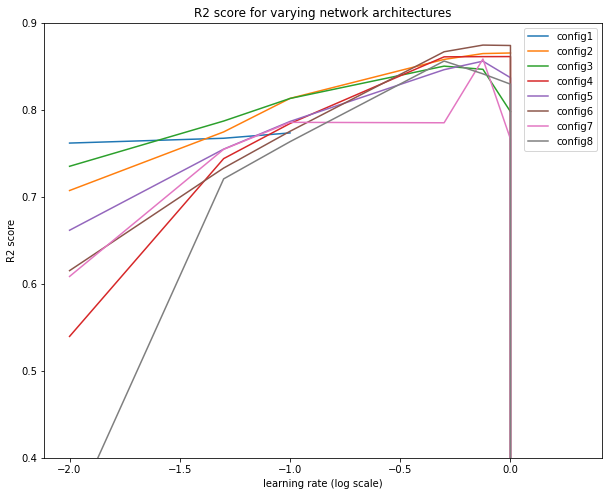

In [70]:
config1 = [21,1]
config2 = [21,5,1]
config3 = [21,10,1]
config4 = [21,5,2,1]
config5 = [21,5,5,1]
config6 = [21,10,5,1]
config7 = [21,10,10,1]
config8 = [21,15,10,5,1]
configs = [config1,config2,config3,config4,config5,config6,config7,config8]

learning_rates = np.array([0.01,0.05,0.1,0.5,0.75,1.0,2.0])
fig = plt.figure(figsize=(10, 8))
for i in range(len(configs)):
    print(f'*** config{i+1} ***')
    r2_score = test_network_configuration(configs[i],learning_rates)
    plt.plot(np.log10(learning_rates),r2_score, label=f'config{i+1}')

axes = plt.gca()
axes.set_ylim([0.4, 0.9])
plt.xlabel('learning rate (log scale)')
plt.ylabel('R2 score')
plt.title('R2 score for varying network architectures')
plt.legend()
plt.show()

<img src="../Results/r2_architecture_regression5.png" width=600 height=450 />
Figure 17: R2 score on test set for a selection of architectures for the neural network. For all models the\n\
logistic sigmoid is used in the hidden layers, cross entropy is the cost function. The models are fitted over 100 \n\
epochs with a batchsize of 50.

Of the network architectures tried, the optimal seems to be configuration number 6 with two hidden layers, one with 10 nodes and one with 5. We will use this configuration fronmhere on.

Next up we explore how this FFNN model is affected by the learning rate, see figure 18. We see the same behavior as in our linear model. The performance is poor when the learning rate is too small and improves with increasing learning rate up to the point where it crashes as the learning rate becomes too big.

In [ ]:
lrs = np.array([0.001,0.005,0.01,0.05,0.1,0.5,0.75,1.0,2.0])
error_lr = np.zeros((len(lrs),2))
for i in range(len(lrs)):
    model = nn.NeuralNet(layers_list=[21,10,5,1], h_af='sigmoid', o_af='none', cost='cross-entropy', lmda=0, metric='r2')
    model.sgd(X=data.X_train, y=data.z_train, n_epochs=100, batchsize=50, learning_rate=lrs[i],print_epochs=False)
    pred = model.predict(data.X_test)
    error_lr[i][0] = nn.r2(pred,data.z_test)
    error_lr[i][1] = nn.mse(pred,data.z_test)


In [ ]:
fig = plt.figure(figsize=(8, 6))
#plt.plot(np.log10(lrs),error_lr[:,1], color='#117733', label='mse (test set)')
plt.plot(np.log10(lrs),error_lr[:,0], color='#CC6677', label='r2 (test set)')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.xlabel('learning rate (log scale)')
plt.ylabel('R2 score')
plt.title('R2 score for increasing learning rate')
plt.legend()
plt.show()

In [73]:
print('Figure 18: How the performance of the FFNN regression model on the franke data changes with the learning rate. \n\
One hidden layer with 10 nodes, and one with 5. The batchsize is 50 and the number of epochs is 100. The hidden \n\
layer uses the sigmoid activation function and the output layer uses no activation function.')

Figure 18: How the performance of the FFNN regression model on the franke data changes with the learning rate. 
One hidden layer with 10 nodes, and one with 5. The batchsize is 50 and the number of epochs is 100. The hidden 
layer uses the sigmoid activation function and the output layer uses no activation function.


In [ ]:
n_epochs = np.array([1,2,5,10,25,50,100,250,500,1000,2500])
error_epoch = np.zeros((len(n_epochs),2))
for i in range(len(n_epochs)):
    model = nn.NeuralNet(layers_list=[21,10,5,1], h_af='sigmoid', o_af='none', cost='cross-entropy', lmda=0, metric='r2')
    model.sgd(X=data.X_train, y=data.z_train, n_epochs=n_epochs[i], batchsize=100, learning_rate=0.8, print_epochs=False)
    pred = model.predict(data.X_test)
    error_epoch[i][0] = nn.r2(pred,data.z_test)
    error_epoch[i][1] = nn.mse(pred,data.z_test)
    print("Finished run for n_epochs =", n_epochs[i])

In [ ]:
fig = plt.figure(figsize=(8, 6))
#plt.plot(np.log10(n_epochs),error_epoch[:,1], color='#117733', label='mse (test set)')
plt.plot(np.log10(n_epochs),error_epoch[:,0], color='#CC6677', label='r2 (test set)')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.xlabel('number of epochs (log scale)')
plt.ylabel('R2 score')
plt.title('R2 score for increasing number of epochs')
plt.legend()
plt.show()
print('Figure 19: How the performance of the FFNN regression model on the franke data changes with the number of \n\
epochs. One hidden layer with 10 nodes, one with 5. The batchsize is 100 and the learning rate is 0.8. The hidden \n\
layer uses the sigmoid activation function and the output layer uses no activation function.')

Figure 19 shows the performance as a function of the number of epochs. We see the $r^2$ score improves with increasing the number, as expected, but from 100 epochs and on it flattens out and no further improvement is seen, meaning increasing the number above this will increase the computational cost at minimal to no additional gain in performance.

Next up is the batchsize, as seen in the plot in figure 20. Even for small batchsizes the perfromance here is good, we don't see the same sensitivity we saw using linear regression with SGD, but we get a similar dip for very large batchsizes. Note that the training set has 7500 entries, so a batchsize of 500 (the first datapoint where we see a reduction in the r2 score) is about $7\%$ of the total training set.

In [ ]:
batch_size = np.array([1,2,5,10,25,50,100,500,1000,5000])
error_bs = np.zeros((len(batch_size),2))
for i in range(len(batch_size)):
    model = nn.NeuralNet(layers_list=[21,10,5,1], h_af='sigmoid', o_af='none', cost='cross-entropy', lmda=0, metric='r2', seed=seed)
    model.sgd(X=data.X_train, y=data.z_train, n_epochs=100, batchsize=batch_size[i], learning_rate=0.8, print_epochs=False)
    pred = model.predict(data.X_test)
    error_bs[i][0] = nn.r2(pred,data.z_test)
    error_bs[i][1] = nn.mse(pred,data.z_test)

In [ ]:
fig = plt.figure(figsize=(8, 6))
#plt.plot(np.log10(batch_size),error_bs[:,1], color='#117733', label='mse (test set)')
plt.plot(np.log10(batch_size),error_bs[:,0], color='#CC6677', label='r2 (test set)')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.xlabel('batch size (log scale)')
plt.ylabel('R2 score')
plt.title('R2 score for increasing the batch size for the GD')
plt.legend()
plt.show()
print('Figure 20: How the performance of the FFNN regression model on the franke data changes with the size of \n\
the batches used in the stochastic gradient descent. One hidden layer with 10 nodes, one with 5. The number of epochs\n\
is 100 and the learning rate is 0.8. The hidden layer uses the sigmoid activation function and the output layer uses \n\
no activation function.')

#### Adding L2 Regularization

We now explore adding regularization to the method, namely l2 regularization. First we look at the choice of the regularization parameter $\lambda$ searching for an optimized value. Figure 21 shows a plot.

In [345]:
lambdas = np.array([0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1.0,2.0,5.0])
error_lmda = np.zeros((len(lambdas),2))
for i in range(len(lambdas)):
    model = nn.NeuralNet(layers_list=[21,10,5,1], h_af='sigmoid', o_af='none', cost='cross-entropy', lmda=lambdas[i], seed=seed)
    model.sgd(X=data.X_train, y=data.z_train, n_epochs=100, batchsize=100, learning_rate=0.8, print_epochs=False)
    pred = model.predict(data.X_test)
    error_lmda[i][0] = nn.r2(pred,data.z_test)
    error_lmda[i][1] = nn.mse(pred,data.z_test)

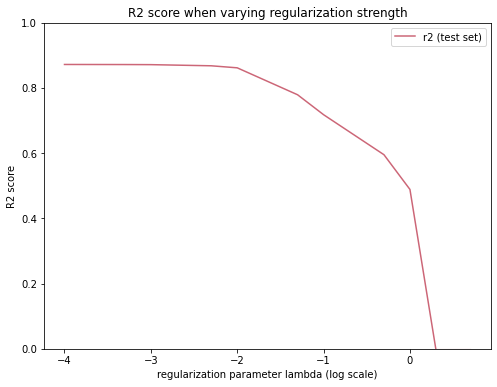

Figure number: How the performance of the FFNN regression model on the franke data changes with the strength/weight
of the l2 regularization. Model with one hidden layer with 10 nodes, one with 5. The number of epochs is 100 and
the learning rate is 0.8. The hidden layer uses the sigmoid activation function and the output layer uses none.


In [349]:
fig = plt.figure(figsize=(8, 6))
#plt.plot(np.log10(lambdas),error_lmda[:,1], color='#117733', label='mse (test set)')
plt.plot(np.log10(lambdas),error_lmda[:,0], color='#CC6677', label='r2 (test set)')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.xlabel('regularization parameter lambda (log scale)')
plt.ylabel('R2 score')
plt.title('R2 score when varying regularization strength')
plt.legend()
plt.show()
print('Figure 21: How the performance of the FFNN regression model on the franke data changes with the strength/weight\n\
of the l2 regularization. Model with one hidden layer with 10 nodes, one with 5. The number of epochs is 100 and\n\
the learning rate is 0.8. The hidden layer uses the sigmoid activation function and the output layer uses none.')

#### Different Activation Functions
There are several available options for the activation function of the nodes in the hidden layers. Figure 22 shows a plot of the r2 score for models when the shape of this activation function is altered. Again the error explodes at different values for the learning rate for the different activation functions, and we have avoided plotting the exploding scores, which is why the plots are over differing ranges of the learning rate. We see from figure 22 that ReLU, ELU and the sigmoid all give similar performance, while leaky ReLU seems to struggle more with the learning rate.

In [395]:
def test_activation_functions(activation_function,learning_rates,seed=135):
    r2_score = np.zeros(len(learning_rates))
    for i in range(len(learning_rates)):
        model = nn.NeuralNet(layers_list=config3, h_af=activation_function, o_af='none', cost='cross-entropy', lmda=0, seed=seed)
        model.sgd(X=data.X_train, y=data.z_train, n_epochs=100, batchsize=50, learning_rate=learning_rates[i], print_epochs=False)
        pred = model.predict(data.X_test)
        r2_score[i] = nn.r2(pred,data.z_test)
        if(np.isnan(r2_score[i])):
            print('Exiting early due to \'nan\'.')
            break
        print("done with ", i, ": ",learning_rates[i],"  r2:", r2_score[i])
    return r2_score

*** activation function: sigmoid ***
done with  0 :  0.001   r2: 0.603201443087635
done with  1 :  0.005   r2: 0.7013013300602701
done with  2 :  0.01   r2: 0.7351632592303365
done with  3 :  0.05   r2: 0.7871916134467114
done with  4 :  0.1   r2: 0.8131384185680848
done with  5 :  0.5   r2: 0.8503120063594798
done with  6 :  0.75   r2: 0.8466549356351774
done with  7 :  1.0   r2: 0.797946090119066


../Code\NeuralNet.py:260: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-z))
../Code\NeuralNet.py:151: RuntimeWarning: invalid value encountered in multiply
  delta = np.dot(self.weights[-l+1].T, delta)*self.h_af_derivative(z)


Exiting early due to 'nan'.
*** activation function: relu ***
done with  0 :  0.001   r2: 0.7528873615240326
done with  1 :  0.005   r2: 0.7966132550261952
done with  2 :  0.01   r2: 0.8190799401379059
done with  3 :  0.05   r2: 0.8649550479812356
done with  4 :  0.1   r2: 0.8706854293382067


../Code\NeuralNet.py:151: RuntimeWarning: invalid value encountered in multiply
  delta = np.dot(self.weights[-l+1].T, delta)*self.h_af_derivative(z)
../Code\NeuralNet.py:104: RuntimeWarning: invalid value encountered in add
  nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, dw_list)]


Exiting early due to 'nan'.
*** activation function: elu ***
done with  0 :  0.001   r2: 0.6967450896224168
done with  1 :  0.005   r2: 0.745601510987024
done with  2 :  0.01   r2: 0.7571559263198138
done with  3 :  0.05   r2: 0.7783951666646705
done with  4 :  0.1   r2: 0.8040431878510034
done with  5 :  0.5   r2: 0.828790090286972


../Code\NeuralNet.py:255: RuntimeWarning: overflow encountered in exp
  return  np.where(z<0, np.exp(z)-1, z)
../Code\NeuralNet.py:260: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-z))
../Code\NeuralNet.py:151: RuntimeWarning: invalid value encountered in multiply
  delta = np.dot(self.weights[-l+1].T, delta)*self.h_af_derivative(z)
../Code\NeuralNet.py:104: RuntimeWarning: overflow encountered in add
  nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, dw_list)]


Exiting early due to 'nan'.
*** activation function: leaky ***
done with  0 :  0.001   r2: 0.009867401374455631
done with  1 :  0.005   r2: 0.4448388668386466
done with  2 :  0.01   r2: 0.4662347320356234
Exiting early due to 'nan'.


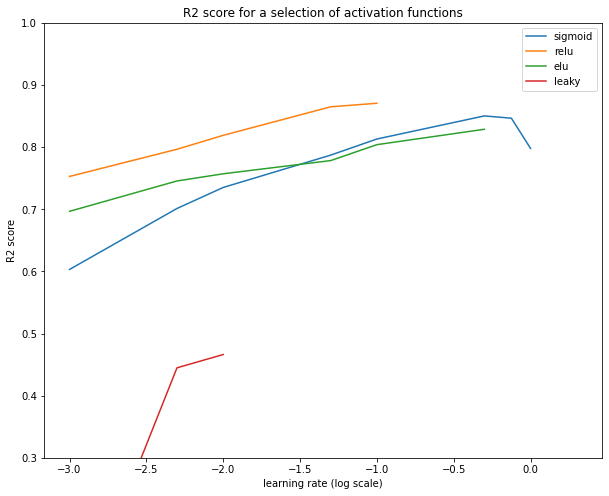

In [409]:
import NeuralNet as nn
importlib.reload(nn)

afs = ['sigmoid', 'relu', 'elu', 'leaky']

learning_rates = np.array([0.001,0.005,0.01,0.05,0.1,0.5,0.75,1.0,2.0])
fig = plt.figure(figsize=(10, 8))
for i in range(len(afs)):
    print(f'*** activation function: {afs[i]} ***')
    r2_score = test_activation_functions(afs[i],learning_rates)
    plt.plot(np.log10(learning_rates),r2_score, label=afs[i])
axes = plt.gca()
axes.set_ylim([0.3, 1])
plt.xlabel('learning rate (log scale)')
plt.ylabel('R2 score')
plt.title('R2 score for a selection of activation functions')
plt.legend()
plt.show()

In [74]:
print('Figure 21: R2 score on test set for a selection of activation functions used in the hidden layers of the\n\
neural network. For all models cross entropy is the cost function and the network architecture is as in config??. The\n\
models are fitted over 100 epochs with a batchsize of 50.')

Figure 21: R2 score on test set for a selection of activation functions used in the hidden layers of the
neural network. For all models cross entropy is the cost function and the network architecture is as in config??. The
models are fitted over 100 epochs with a batchsize of 50.


Epoch 1: Measured r2: 0.05132243272805925
Epoch 2: Measured r2: 0.1120657017441441
Epoch 3: Measured r2: 0.18548235622269205
Epoch 4: Measured r2: 0.24400851354608522
Epoch 5: Measured r2: 0.305524345145738
Epoch 6: Measured r2: 0.3603621798948524
Epoch 7: Measured r2: 0.4070416758854697
Epoch 8: Measured r2: 0.44560688525202674
Epoch 9: Measured r2: 0.4715425017154936
Epoch 10: Measured r2: 0.4996776360116807
Epoch 11: Measured r2: 0.514511623516172
Epoch 12: Measured r2: 0.5303013721066531
Epoch 13: Measured r2: 0.5331742189636369
Epoch 14: Measured r2: 0.5459887527587511
Epoch 15: Measured r2: 0.5511497952428848
Epoch 16: Measured r2: 0.5566123682569214
Epoch 17: Measured r2: 0.5579171853279994
Epoch 18: Measured r2: 0.5644455967527493
Epoch 19: Measured r2: 0.5615654430777937
Epoch 20: Measured r2: 0.5683915714112007
Epoch 21: Measured r2: 0.5732272880801721
Epoch 22: Measured r2: 0.5757756705788875
Epoch 23: Measured r2: 0.5784400566561512
Epoch 24: Measured r2: 0.5805693347448951

Now that we have optimalized our parameters to an extent, we compare the performance of this model with theat of the $\texttt{MLPRegressor}$ in $\texttt{scikit-learn}$,

In [368]:
# Add regularization?

# scikit-learn neural net with SGD - regression #
from sklearn.neural_network import MLPRegressor
sk_nn_regressor = MLPRegressor(hidden_layer_sizes=(10,5), activation='logistic', solver='sgd', alpha=0.0, 
                               batch_size=50, learning_rate='constant', learning_rate_init=0.5, max_iter=2000, 
                               shuffle=True, random_state=587)
sk_nn_regressor.fit(data.X_train, data.z_train)
pred = sk_nn_regressor.predict(data.X_test)
r2_sk = nn.r2(pred,data.z_test)
mse_sk = nn.mse(pred,data.z_test)

# Own code for FFNN - regression #
own_nn_regressor = nn.NeuralNet(layers_list=[21,10,5,1], h_af='sigmoid', o_af='none', cost='cross-entropy', lmda=0, seed=seed)
own_nn_regressor.sgd(X=data.X_train, y=data.z_train, n_epochs=100, batchsize=50, learning_rate=0.1, print_epochs=False)
pred = model.predict(data.X_test)
r2_own = nn.r2(pred,data.z_test)
mse_own = nn.mse(pred,data.z_test)

print(r2_sk,"   ", mse_sk)
print(r2_own,"   ", mse_own)
             

0.8746547497215121     0.011063607118505937
-804.7445988193437     71.11910231452401


### Neural Network - Classification

I will now use my Neural Network code to perform classification of handwritten numbers. I will begin by performing the clasification using $\texttt{scikit-learn}$'s $\texttt{MLPClassifier}$ to have something to compare my model to. I set up this network with 64 input nodes, corresponding to the 64 pixels in each digit image, one layer of 30 hidden nodes, and finally an output layer of 10 nodes, corresponding to the 10 output possibilities. The activation function of the output layer is the softmax, while the hidden layer(s) use the sigmoid. I am not using regularization here. Note that the $\texttt{MLPClassifier}$ implicitly designs the input and output layers based on the provided data in $\texttt{fit()}$ method. It uses cross-entropy as the default cost function. 

In [166]:
# Setting the predictors/inputs and the target
digits = datasets.load_digits()
digit_target = digits.target
digit_input = digits.images
n_inputs = len(digit_input)
digit_input = digit_input.reshape(n_inputs, -1)


# Splitting into training and test
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(digit_input, digit_target, stratify=digit_target,
                                                    train_size=train_size, random_state=97)

In [188]:
from sklearn.neural_network import MLPClassifier

h_activation = 'logistic'
o_activation = 'softmax'
lr = 0.005
batch_size = 10
seed = 796
n_input_nodes = 64
n_hidden_nodes = 30
n_output_nodes = 10

sk_nn_classifier = MLPClassifier(hidden_layer_sizes=(n_hidden_nodes, ), activation=h_activation, solver='sgd', alpha=0, 
                                 batch_size=batch_size, learning_rate='constant', learning_rate_init=lr, max_iter=200, 
                                 shuffle=True, random_state=seed)
sk_nn_classifier.fit(X_train, y_train)
pred = sk_nn_classifier.predict(X_test)
accuracy = nn.accuracy(pred,y_test)
print("The measured accuracy of FFNN on the test set using scikit-learn's MLPClassifier \n\
with one hidden layer of 30 nodes, %s activation function in the output layer \n\
and %s in the hidden layer is: %f" %(o_activation, h_activation, accuracy))

The measured accuracy of FFNN on the test set using scikit-learn's MLPClassifier 
with one hidden layer of 30 nodes, softmax activation function in the output layer 
and logistic in the hidden layer is: 0.977778


We get a very impressive accuracy score of $\approx0.98$ using $\texttt{scikit-learn}$. Let us see how our model does with the same set up.

In [169]:
# comparing with other digit dataset
import NeuralNet as nn
importlib.reload(nn)

training_data, validation_data, test_data = load_data_wrapper()
X_train, y_train = zip(*training_data)
X=np.squeeze(X_train)
y=np.squeeze(y_train)
X_test, y_test = zip(*test_data)
X_test=np.squeeze(X_test)
y_test=np.squeeze(y_test)

#X_train, X_test, y_train, y_test = train_test_split(digit_input, digit_target, stratify=digit_target,train_size=train_size,random_state=97)

nn_class = nn.NeuralNet(layers_list=[784, 30, 10], h_af='sigmoid', o_af='softmax', cost='cross-entropy', seed=seed)
nn_class.sgd(X=X, y=y, n_epochs=10, batchsize=100, learning_rate=3.0, test_data=zip(X_test,y_test))

Epoch 1: Accuracy measured to 0.8909
Epoch 2: Accuracy measured to 0.9104
Epoch 3: Accuracy measured to 0.9145
Epoch 4: Accuracy measured to 0.9252
Epoch 5: Accuracy measured to 0.9283
Epoch 6: Accuracy measured to 0.9323
Epoch 7: Accuracy measured to 0.9336
Epoch 8: Accuracy measured to 0.9338
Epoch 9: Accuracy measured to 0.94
Epoch 10: Accuracy measured to 0.9392


In [212]:
import NeuralNet as nn
importlib.reload(nn)
X_train, X_test, y_train, y_test = train_test_split(digit_input, digit_target, stratify=digit_target,train_size=train_size,random_state=97)
nn_class = nn.NeuralNet(layers_list=[64, 30, 10], h_af='sigmoid', o_af='softmax', cost='cross-entropy', seed=seed)
nn_class.sgd(X=X_train, y=y_train, n_epochs=100, batchsize=100, learning_rate=0.5, test_data=zip(X_test,y_test))


Epoch 1: Accuracy measured to 0.7083333333333334
Epoch 2: Accuracy measured to 0.8555555555555555
Epoch 3: Accuracy measured to 0.9333333333333333
Epoch 4: Accuracy measured to 0.9277777777777778
Epoch 5: Accuracy measured to 0.9527777777777777
Epoch 6: Accuracy measured to 0.9138888888888889
Epoch 7: Accuracy measured to 0.975
Epoch 8: Accuracy measured to 0.9777777777777777
Epoch 9: Accuracy measured to 0.9722222222222222
Epoch 10: Accuracy measured to 0.975
Epoch 11: Accuracy measured to 0.9833333333333333
Epoch 12: Accuracy measured to 0.9916666666666667
Epoch 13: Accuracy measured to 0.9722222222222222
Epoch 14: Accuracy measured to 0.975
Epoch 15: Accuracy measured to 0.9861111111111112
Epoch 16: Accuracy measured to 0.9805555555555555
Epoch 17: Accuracy measured to 0.9805555555555555
Epoch 18: Accuracy measured to 0.9833333333333333
Epoch 19: Accuracy measured to 0.9861111111111112
Epoch 20: Accuracy measured to 0.9888888888888889
Epoch 21: Accuracy measured to 0.988888888888888

In [226]:
pred = nn_class.predict(X_test)
accuracy = nn.accuracy(pred,y_test)
print("The measured accuracy of FFNN on the test set using our custom neural net class \n\
with one hidden layer of 30 nodes, %s activation function in the output layer \n\
and %s in the hidden layer is: %f" %(o_activation, h_activation, accuracy))


The measured accuracy of FFNN on the test set using our custom neural net class 
with one hidden layer of 30 nodes, softmax activation function in the output layer 
and logistic in the hidden layer is: 0.988889


%I'm kind of using test to fit model -> use train as test data? maybe set aside a fraction of the training data %

Our custom neural network code for classification actually performs better that the $\texttt{scikit-learn}$ class. However it is worth noting that we don't have very many data points and our performance is not very stable to initialation values and changes in the learning rate. 

In [ ]:
def resulting_accuracy(model,X_test,y_test):
    pred = model.predict(X_test)
    return nn.accuracy(pred,y_test)

In [245]:
import NeuralNet as nn
importlib.reload(nn)
X_train, X_test, y_train, y_test = train_test_split(digit_input, digit_target, stratify=digit_target,train_size=train_size,random_state=97)

n_epochs = np.array([1,2,5,10,25,50,100,250,500,1000,2500])
accuracy_epochs = np.zeros((len(n_epochs),2))
for i in range(len(n_epochs)):
    model = nn.NeuralNet(layers_list=[64, 30, 10], h_af='sigmoid', o_af='softmax', cost='cross-entropy', seed=seed)
    model.sgd(X=X_train, y=y_train, n_epochs=n_epochs[i], batchsize=100, learning_rate=0.5,print_epochs=False)
    accuracy_epochs[i][0] = resulting_accuracy(model,X_test,y_test)
    accuracy_epochs[i][1] = resulting_accuracy(model,X_train,y_train)


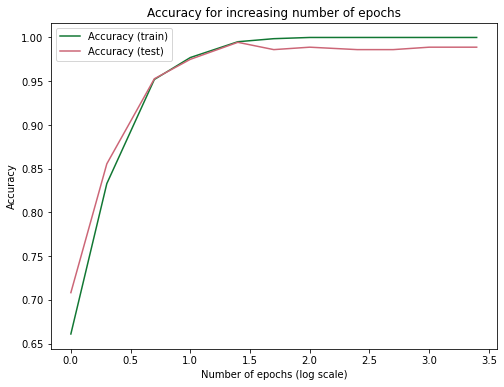

Figure number: How accuracy of the FFNN classification model changes with the number of epochs. One hidden layer with 30 nodes, batchsize is 100 and the learning rate is 0.5. The hidden layer uses the sigmoid activation function and the output layer uses the softmax.


In [246]:
fig = plt.figure(figsize=(8, 6))
plt.plot(np.log10(n_epochs),accuracy_epochs[:,1], color='#117733', label='Accuracy (train)')
plt.plot(np.log10(n_epochs),accuracy_epochs[:,0], color='#CC6677', label='Accuracy (test)')
plt.xlabel('Number of epochs (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy for increasing number of epochs')
plt.legend()
plt.show()
print('Figure number: How accuracy of the FFNN classification model changes with the number of epochs. One hidden \
layer with 30 nodes, batchsize is 100 and the learning rate is 0.5. The hidden layer uses the sigmoid activation \
function and the output layer uses the softmax.')

In [249]:
ei = 4
print("The max accuracy on the test set is %f after %d epochs." %(accuracy_epochs[ei][0],n_epochs[ei]))

The max accuracy on the test set is 0.994444 after 25 epochs.


In [252]:
lrs = np.array([0.001,0.005,0.01,0.05,0.1,0.5,1.0,2.0,5.0])
accuracy_lr = np.zeros((len(lrs),2))
for i in range(len(lrs)):
    model = nn.NeuralNet(layers_list=[64, 30, 10], h_af='sigmoid', o_af='softmax', cost='cross-entropy', seed=seed)
    model.sgd(X=X_train, y=y_train, n_epochs=100, batchsize=100, learning_rate=lrs[i],print_epochs=False)
    accuracy_lr[i][0] = resulting_accuracy(model,X_test,y_test)
    accuracy_lr[i][1] = resulting_accuracy(model,X_train,y_train)

../Code\NeuralNet.py:235: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-z))


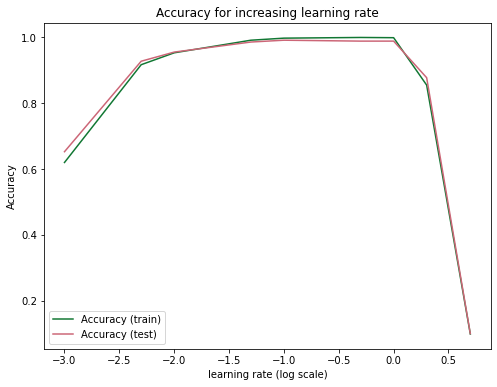

Figure number: How accuracy of the FFNN classification model changes with the learning rate. One hidden layer with 30 nodes, batchsize is 100 and the number of epochs is 100. The hidden layer uses the sigmoid activation function and the output layer uses the softmax.


In [253]:
fig = plt.figure(figsize=(8, 6))
plt.plot(np.log10(lrs),accuracy_lr[:,1], color='#117733', label='Accuracy (train)')
plt.plot(np.log10(lrs),accuracy_lr[:,0], color='#CC6677', label='Accuracy (test)')
plt.xlabel('learning rate (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy for increasing learning rate')
plt.legend()
plt.show()
print('Figure number: How accuracy of the FFNN classification model changes with the learning rate. One hidden \
layer with 30 nodes, batchsize is 100 and the number of epochs is 100. The hidden layer uses the sigmoid activation \
function and the output layer uses the softmax.')

In [254]:
batch_size = np.array([1,2,5,10,25,50,100,500,1000])
accuracy_bs = np.zeros((len(batch_size),2))
for i in range(len(batch_size)):
    model = nn.NeuralNet(layers_list=[64, 30, 10], h_af='sigmoid', o_af='softmax', cost='cross-entropy', seed=seed)
    model.sgd(X=X_train, y=y_train, n_epochs=100, batchsize=batch_size[i], learning_rate=0.5,print_epochs=False)
    accuracy_bs[i][0] = resulting_accuracy(model,X_test,y_test)
    accuracy_bs[i][1] = resulting_accuracy(model,X_train,y_train)

../Code\NeuralNet.py:235: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-z))


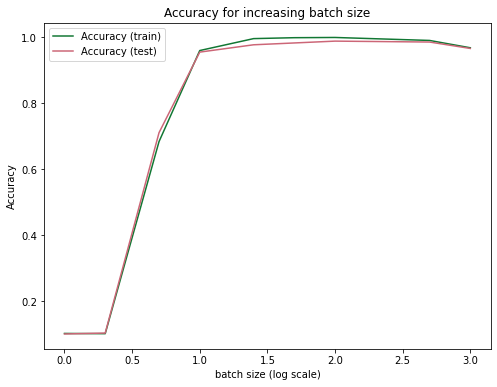

Figure number: How accuracy of the FFNN classification model changes with the batch size. One hidden layer with 30 nodes, larning rate is 0.5 and the number of epochs is 100. The hidden layer uses the sigmoid activation function and the output layer uses the softmax.


In [255]:
fig = plt.figure(figsize=(8, 6))
plt.plot(np.log10(batch_size),accuracy_bs[:,1], color='#117733', label='Accuracy (train)')
plt.plot(np.log10(batch_size),accuracy_bs[:,0], color='#CC6677', label='Accuracy (test)')
plt.xlabel('batch size (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy for increasing batch size')
plt.legend()
plt.show()
print('Figure number: How accuracy of the FFNN classification model changes with the batch size. One hidden \
layer with 30 nodes, larning rate is 0.5 and the number of epochs is 100. The hidden layer uses the sigmoid activation \
function and the output layer uses the softmax.')

#### Adding Regularization
To avoid overfitting and increase the generalization of a model one can add a regularixation term. As we have seen in the results so far we don't appear too troubled by overfitting in our classification model with our current parameters. Adding regularization can also make the model more stable to changes in these parameters.

In [261]:
lambdas = np.array([0.001,0.005,0.01,0.05,0.1,0.5,1.0,2.0,5.0])
accuracy_lmda = np.zeros((len(lambdas),2))
for i in range(len(lambdas)):
    model = nn.NeuralNet(layers_list=[64, 30, 10], h_af='sigmoid', o_af='softmax', cost='cross-entropy', lmda=lambdas[i],seed=seed)
    model.sgd(X=X_train, y=y_train, n_epochs=100, batchsize=100, learning_rate=0.5,print_epochs=False)
    accuracy_lmda[i][0] = resulting_accuracy(model,X_test,y_test)
    accuracy_lmda[i][1] = resulting_accuracy(model,X_train,y_train)

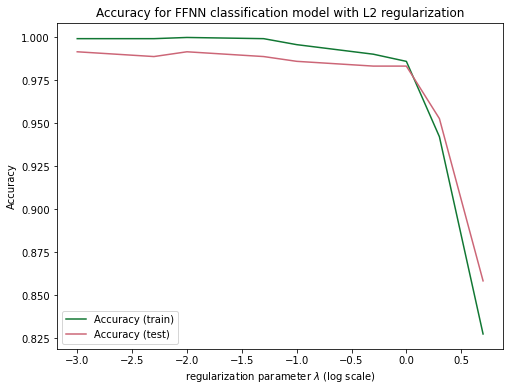

Figure number: The FFNN classification model with added l2 regularization. One hidden layer with 30 nodes, learning 
rate is 0.5 and the number of epochs is 100. The hidden layer uses the sigmoid activation function and the output 
layer uses the softmax.


In [264]:
fig = plt.figure(figsize=(8, 6))
plt.plot(np.log10(lambdas),accuracy_lmda[:,1], color='#117733', label='Accuracy (train)')
plt.plot(np.log10(lambdas),accuracy_lmda[:,0], color='#CC6677', label='Accuracy (test)')
plt.xlabel('regularization parameter $\lambda$ (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy for FFNN classification model with L2 regularization')
plt.legend()
plt.show()
print('Figure number: The FFNN classification model with added l2 regularization. One hidden \
layer with 30 nodes, learning \nrate is 0.5 and the number of epochs is 100. The hidden layer uses the sigmoid activation \
function and the output \nlayer uses the softmax.')

In [100]:
import NeuralNet as nn
importlib.reload(nn)
X_train, X_test, y_train, y_test = train_test_split(digit_input, digit_target, stratify=digit_target,train_size=train_size,random_state=97)

(1437, 10)
Epoch 1 complete


In [140]:
# Setting the predictors/inputs and the target
digits = datasets.load_digits()
digit_target = digits.target
digit_input = digits.images
n_inputs = len(digit_input)
digit_input = digit_input.reshape(n_inputs, -1)


# Splitting into training and test
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(digit_input, digit_target, stratify=digit_target,
                                                    train_size=train_size)

np.shape(y_train)

(1437,)

### Logistic Regression - Classification

We have used our neural network for classification and now we want to compare our result with a different method. The method of choice is logistic regression. As we are performing classification to multiple classes (not binary classification) we use the softmax in place of the standard sigmoid. This form of logistic regression is called multinomial logistic regression or simply softmax regression. Our cost function is again cross-entropy.

We have our own code for this as well, but first we attempt classification of our digit data with $\texttt{scikit-learn}$'s $\texttt{SGDClassifier}$. Setting the $\texttt[loss}$ parameter of this method to 'log' gives a logistic regression for classification.

In [ ]:
from sklearn.linear_model import SGDClassifier
import LogisticRegression as lr
importlib.reload(lr)

seed=734
logreg_skl = SGDClassifier(loss='log', penalty='l2', alpha=0.0, fit_intercept=False, max_iter=1000, shuffle=True, 
                           random_state=seed, learning_rate='constant', eta0=0.1)
logreg_skl.fit(X_train,y_train)
sk_pred = logreg_skl.predict(X_test)
accuracy_sk = lr.accuracy(pred,y_test)


In [ ]:
np.shape(y_test)

In [26]:
import importlib

importlib.reload(cd)
importlib.reload(lr_gd)


NameError: name 'lr_gd' is not defined

0.9995996508522816


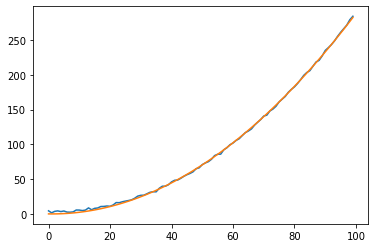

In [558]:
n = 100
x1 = np.linspace(0,10,n)
x2 = x1*x1

X = np.ones((n,2))
x[:,0] = x1
x[:,1] = x2
y_true = 4+3*x[:,1].reshape(n,1)-2*x[:,0].reshape(n,1)+np.random.randn(n,1)


current_model = lr_gd.LinearRegressionwithGradientDescent(method="sgd",alpha=0,n_epochs=10,batchsize=5,learning_rate=0.00001)
train_hat = current_model.fit(x,y_true)
print(r2(train_hat,y_true))

plt.plot(y_true)
plt.plot(train_hat)

In [82]:
"""
mnist_loader
~~~~~~~~~~~~

A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import pickle as cPickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('../Data/mnist.pkl.gz', 'rb')
    u = cPickle._Unpickler( f )
    u.encoding = 'latin1'
    #train, val, test = u.load()
    training_data, validation_data, test_data = u.load()#cPickle.load(f)
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, tr_d[1])
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_results = [vectorized_result(y) for y in te_d[1]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

# Conclusion

# Bibliography

[1] Project 1: https://github.com/emiliefj/FYS-STK3155/blob/master/Project1/Report/Project%201%20-%20FYS-STK3155.pdf

[2] Digits dataset in scikit-learn: https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

[3} https://www.bogotobogo.com/python/scikit-learn/scikit-learn_batch-gradient-descent-versus-stochastic-gradient-descent.php

[4] Universal approximation theorem: https://en.wikipedia.org/wiki/Universal_approximation_theorem

[5] Slides week 40: https://compphysics.github.io/MachineLearning/doc/pub/week40/html/week40.html

[6] Softmax function: https://en.wikipedia.org/wiki/Softmax_function

[7] Neural Networks and classification of handwritten digits: http://neuralnetworksanddeeplearning.com

[8] Softmax Regression tutorial: http://saitcelebi.com/tut/output/part2.html

[9] Standford Softmax Regression tutorial: http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/